In [20]:
# Financial Data Analysis Notebook
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm
from script.fetch_data import stock_data 

c:\Users\hp\Desktop\10 Academy\Ass\Week-11\script\fetch_data.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
[                       0%                       ]

Fetching data from Yahoo Finance...


[*********************100%***********************]  3 of 3 completed


In [ ]:

# Task 1: Data Cleaning and Understanding
# -------------------------------

# Check data structure
print("\nData structure overview:")
print(stock_data.head())

# Check for missing values
print("\nMissing values per ticker:")
for ticker in tickers:
    print(f"{ticker}:")
    print(stock_data[ticker].isnull().sum())

# Handle missing values by forward filling (common for financial data)
stock_data_clean = stock_data.ffill()

# Verify no missing values remain
print("\nMissing values after cleaning:")
for ticker in tickers:
    print(f"{ticker}:")
    print(stock_data_clean[ticker].isnull().sum())

# Basic statistics
print("\nBasic statistics for each asset:")
for ticker in tickers:
    print(f"\n{ticker} Statistics:")
    print(stock_data_clean[ticker].describe())



Data structure overview:
Ticker             SPY                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2015-07-01  175.111010  175.363905  174.124732  174.917130  135979900   
2015-07-02  175.397596  175.566188  174.335441  174.756927  104373700   
2015-07-06  173.458760  175.043542  173.256441  174.259583  117975400   
2015-07-07  174.461933  175.481925  172.059452  175.355484  173820200   
2015-07-08  174.006719  174.293327  172.177466  172.413498  164020100   

Ticker            BND                                                 TSLA  \
Price            Open       High        Low      Close   Volume       Open   
Date                                                                         
2015-07-01  60.794156  60.914433  60.764085  60.816708  5399300  18.073999   
2015-07-02  60.937054  61.027267  60.937054  60.967125  1060100  18.680000   

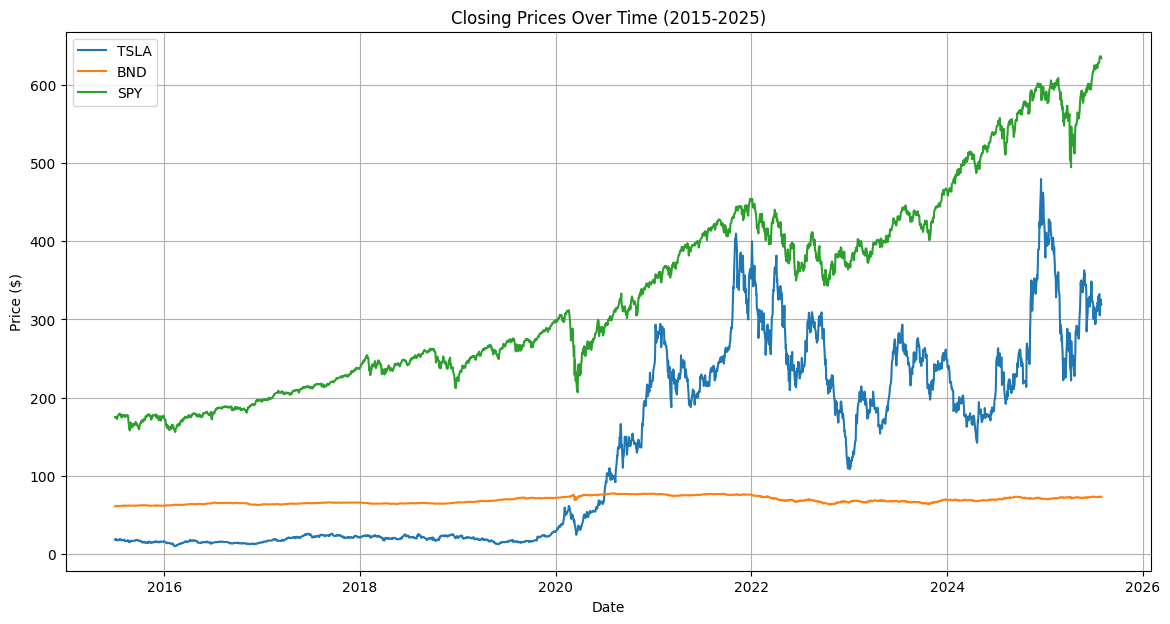

In [11]:

# Task 2: Exploratory Data Analysis (EDA)
# =======================================

# Plot closing prices over time
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stock_data_clean[ticker]['Close'], label=ticker)
plt.title('Closing Prices Over Time (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


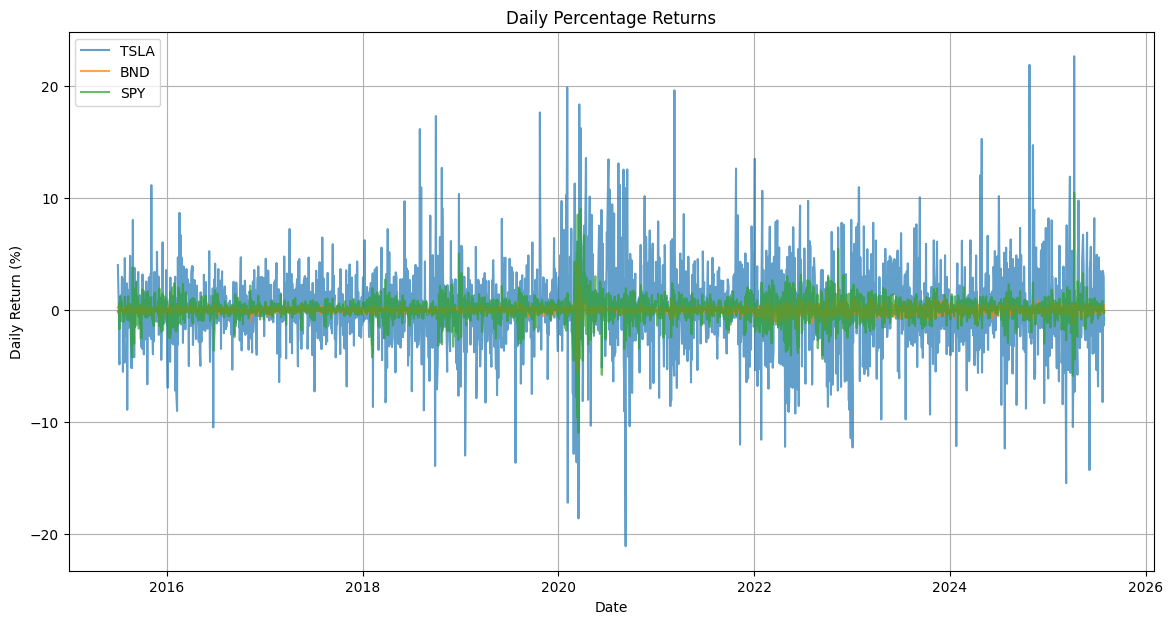

In [12]:

# Calculate daily returns
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker] = stock_data_clean[ticker]['Close'].pct_change() * 100

# Plot daily percentage changes
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Percentage Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()


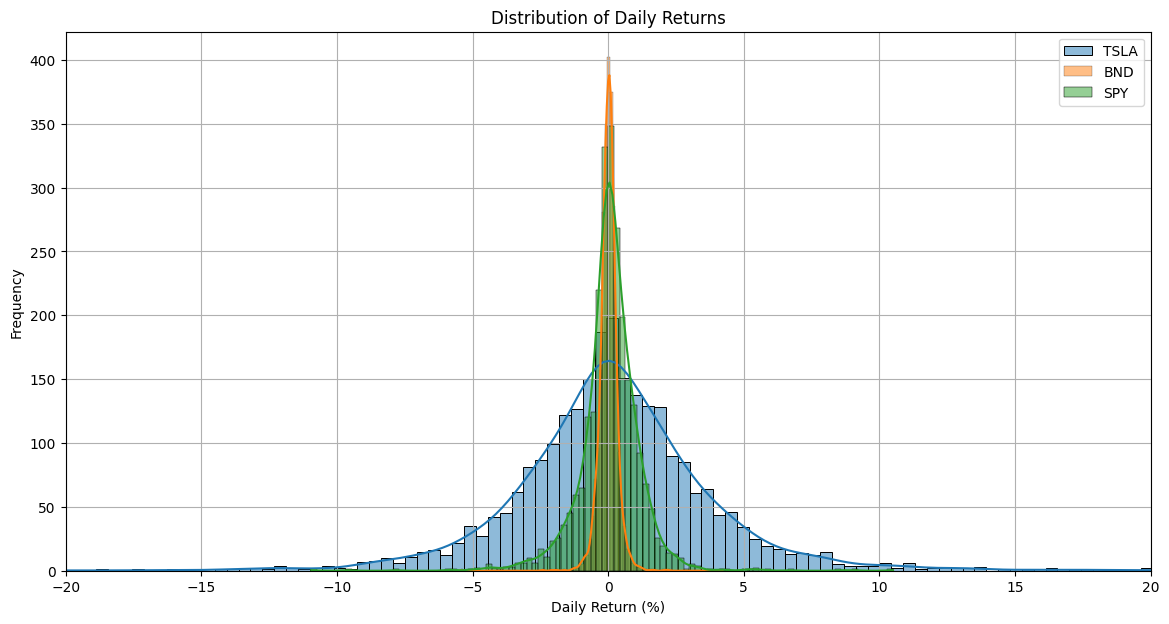

In [13]:

# Plot distribution of daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(returns[ticker], kde=True, label=ticker, bins=100)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(-20, 20)  # Limit x-axis for better visualization
plt.grid(True)
plt.show()


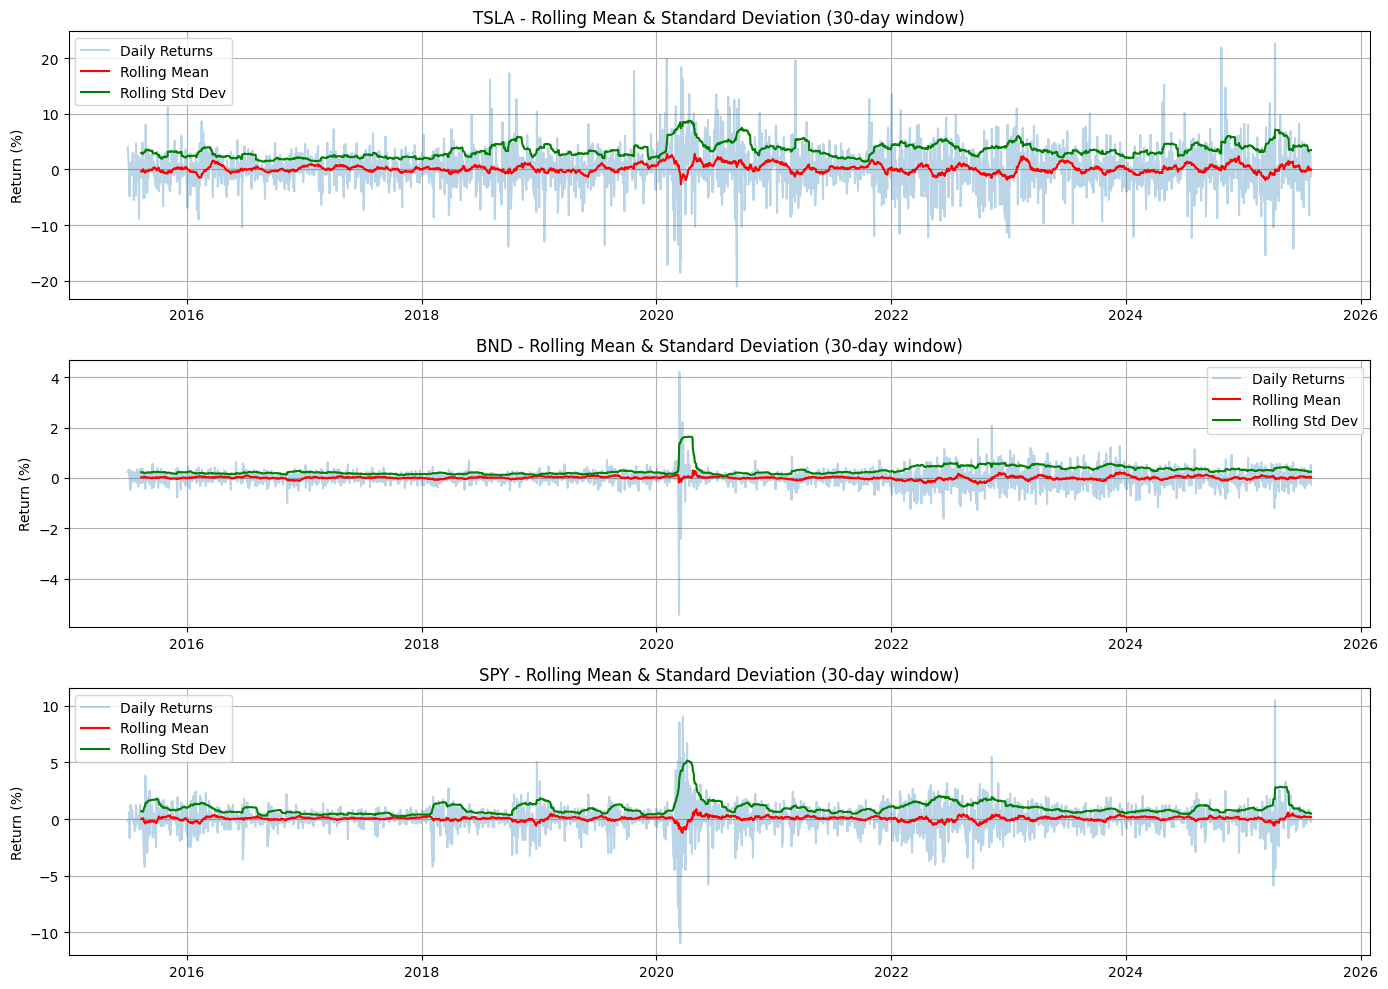

In [14]:

# Calculate and plot rolling statistics (30-day window)
window = 30

plt.figure(figsize=(14, 10))
for i, ticker in enumerate(tickers, 1):
    plt.subplot(3, 1, i)
    rolling_mean = returns[ticker].rolling(window=window).mean()
    rolling_std = returns[ticker].rolling(window=window).std()
    
    plt.plot(returns[ticker], label='Daily Returns', alpha=0.3)
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='green')
    
    plt.title(f'{ticker} - Rolling Mean & Standard Deviation (30-day window)')
    plt.ylabel('Return (%)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:

# Task 3: Stationarity and Volatility Analysis
# ============================================

# Augmented Dickey-Fuller test for stationarity
print("\nAugmented Dickey-Fuller Test Results:")
for ticker in tickers:
    result = adfuller(stock_data_clean[ticker]['Close'].dropna())
    print(f"\n{ticker} Closing Price:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    # Test interpretation
    if result[1] <= 0.05:
        print("Conclusion: The series is stationary")
    else:
        print("Conclusion: The series is non-stationary")

# Test on returns instead of prices
print("\nADF Test on Daily Returns:")
for ticker in tickers:
    result = adfuller(returns[ticker].dropna())
    print(f"\n{ticker} Daily Returns:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Conclusion: The series is stationary")
    else:
        print("Conclusion: The series is non-stationary")



Augmented Dickey-Fuller Test Results:

TSLA Closing Price:
ADF Statistic: -1.418872005396829
p-value: 0.5731959514207214
Critical Values:
   1%: -3.4329610922579095
   5%: -2.8626935681060375
   10%: -2.567384088736619
Conclusion: The series is non-stationary

BND Closing Price:
ADF Statistic: -1.5362494162327047
p-value: 0.5155091864753708
Critical Values:
   1%: -3.432946577138947
   5%: -2.8626871581881708
   10%: -2.5673806760176046
Conclusion: The series is non-stationary

SPY Closing Price:
ADF Statistic: 0.6908124400891181
p-value: 0.9896527213599752
Critical Values:
   1%: -3.4329424595562963
   5%: -2.862685339846278
   10%: -2.5673797079109892
Conclusion: The series is non-stationary

ADF Test on Daily Returns:

TSLA Daily Returns:
ADF Statistic: -34.6810904725418
p-value: 0.0
Conclusion: The series is stationary

BND Daily Returns:
ADF Statistic: -9.889762802713948
p-value: 3.58383369782961e-17
Conclusion: The series is stationary

SPY Daily Returns:
ADF Statistic: -16.2643

In [16]:

# Task 4: Risk Analysis
# =====================

# Calculate Value at Risk (VaR) at 95% confidence
confidence_level = 0.95

print("\nValue at Risk (VaR) at 95% confidence:")
for ticker in tickers:
    var = norm.ppf(1 - confidence_level, returns[ticker].mean(), returns[ticker].std())
    print(f"{ticker}: {var:.2f}% daily loss")

# Calculate Sharpe Ratio (assuming risk-free rate = 0 for simplicity)
print("\nSharpe Ratios (annualized):")
for ticker in tickers:
    sharpe_ratio = returns[ticker].mean() / returns[ticker].std() * np.sqrt(252)
    print(f"{ticker}: {sharpe_ratio:.2f}")

# Outlier detection
print("\nOutlier Analysis (Days with returns > 3 standard deviations):")
for ticker in tickers:
    threshold = 3 * returns[ticker].std()
    outliers = returns[ticker][abs(returns[ticker]) > threshold]
    print(f"\n{ticker} had {len(outliers)} outlier days:")
    print(outliers.sort_values())



Value at Risk (VaR) at 95% confidence:
TSLA: -5.95% daily loss
BND: -0.56% daily loss
SPY: -1.83% daily loss

Sharpe Ratios (annualized):
TSLA: 0.78
BND: 0.36
SPY: 0.79

Outlier Analysis (Days with returns > 3 standard deviations):

TSLA had 43 outlier days:
Date
2020-09-08   -21.062824
2020-03-16   -18.577806
2020-02-05   -17.175839
2020-03-18   -16.034404
2025-03-10   -15.426207
2025-06-05   -14.259894
2018-09-28   -13.901537
2019-07-25   -13.613708
2020-03-09   -13.572526
2019-01-18   -12.971116
2020-02-27   -12.814584
2024-07-24   -12.334605
2023-01-03   -12.242249
2022-04-26   -12.184122
2024-01-25   -12.125293
2021-11-09   -11.990303
2020-03-12   -11.617242
2022-01-27   -11.554176
2022-12-27   -11.408853
2020-08-17    11.203058
2020-03-02    11.322034
2025-03-24    11.933580
2024-04-24    12.061109
2020-08-31    12.568905
2020-09-14    12.583177
2021-10-25    12.661598
2018-10-23    12.718905
2020-08-12    13.123639
2020-07-06    13.479394
2022-01-03    13.531668
2020-04-13    1